In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math


In [4]:
data=pd.read_excel('Cycle Power Plant.xlsx')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
data.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [6]:
data.shape

(9568, 5)

In [7]:
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


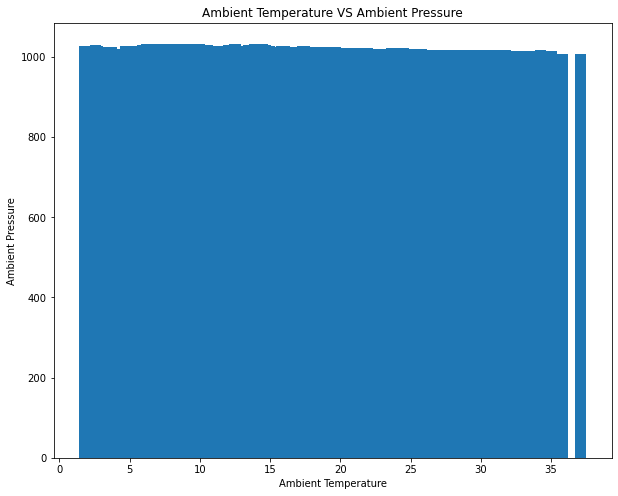

In [9]:
plt.figure(figsize=(10,8))
x='AT'
y='AP'
plt.bar(x,y,data=data)
plt.xlabel('Ambient Temperature')
plt.ylabel('Ambient Pressure')
plt.title('Ambient Temperature VS Ambient Pressure')
plt.show()

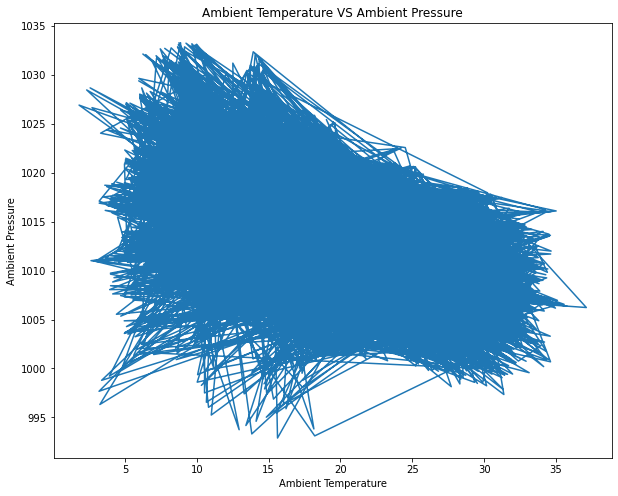

In [10]:
plt.figure(figsize=(10,8))
x='AT'
y='AP'
plt.plot(x,y,data=data)
plt.xlabel('Ambient Temperature')
plt.ylabel('Ambient Pressure')
plt.title('Ambient Temperature VS Ambient Pressure')
plt.show()

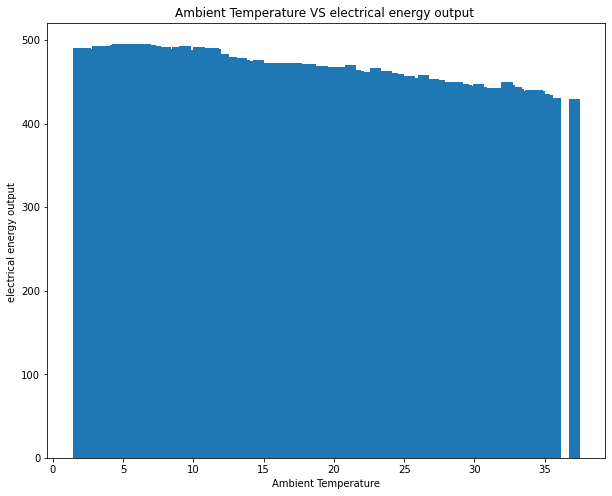

In [11]:
plt.figure(figsize=(10,8))
x='AT'
y='PE'
plt.bar(x,y,data=data)
plt.xlabel('Ambient Temperature')
plt.ylabel('electrical energy output ')
plt.title('Ambient Temperature VS electrical energy output ')
plt.show()

In [12]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


<AxesSubplot:>

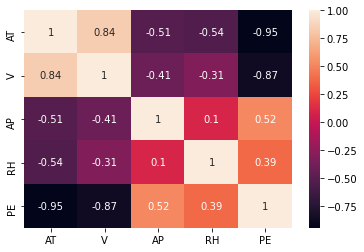

In [13]:
sns.heatmap(data.corr(),annot=True)

In [14]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [15]:
print(x)

         AT      V       AP     RH
0     14.96  41.76  1024.07  73.17
1     25.18  62.96  1020.04  59.08
2      5.11  39.40  1012.16  92.14
3     20.86  57.32  1010.24  76.64
4     10.82  37.50  1009.23  96.62
...     ...    ...      ...    ...
9563  16.65  49.69  1014.01  91.00
9564  13.19  39.18  1023.67  66.78
9565  31.32  74.33  1012.92  36.48
9566  24.48  69.45  1013.86  62.39
9567  21.60  62.52  1017.23  67.87

[9568 rows x 4 columns]


In [16]:
print(y)

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x.shape,x_train.shape,x_test.shape

((9568, 4), (7654, 4), (1914, 4))

In [18]:
model=LinearRegression()

In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [23]:
prediction=model.predict(x_test)
print(prediction)

[431.42761597 458.56124622 462.75264705 ... 469.51835895 442.41759454
 461.88279939]


In [25]:
print('Accuracy on Training Data',model.score(x_train,y_train))

Accuracy on Training Data 0.9277253998587902


In [26]:
print('Accuracy on Testing Data',model.score(x_test,y_test))

Accuracy on Testing Data 0.9325315554761302


In [28]:
MAE=mean_absolute_error(y_test,prediction)
print(MAE)

3.566564655203823


In [30]:
MSE=mean_squared_error(y_test,prediction)
print(MSE)

19.733699303497648


In [31]:
prediction.tolist()

[431.4276159706179,
 458.5612462171292,
 462.7526470500491,
 448.5959620557521,
 457.87077697617235,
 429.6938392833401,
 473.0418532931305,
 456.5083630282457,
 474.34049146595083,
 446.3430286667908,
 441.939223566117,
 441.47514583990846,
 444.72106894203966,
 440.8429431759158,
 438.401018841695,
 454.31623315181685,
 444.895091394303,
 437.38691544847455,
 451.30037373047855,
 427.4426449285071,
 425.3885847426599,
 431.82819052477817,
 474.1222256038428,
 439.7318130285015,
 447.87537592359394,
 452.50969912992855,
 481.63906817738376,
 444.59624831092333,
 451.9444648418351,
 466.6147933125494,
 477.1095486520995,
 461.92513600522807,
 473.91169712272966,
 468.4687343463339,
 469.5921588064432,
 433.7389416912886,
 466.39616777968905,
 479.9272929423249,
 433.78400122297376,
 472.1104829691858,
 446.1601455243624,
 466.3937842770285,
 456.909949332953,
 479.7206273734384,
 443.63914693936067,
 439.8673571036922,
 433.17093971893183,
 438.2524834449661,
 470.21487862779435,
 440.

In [35]:
Data=pd.DataFrame({'Actual':y_test,'Predicted Result':prediction,'Difference':y_test-prediction})
print(Data)

      Actual  Predicted Result  Difference
4834  431.23        431.427616   -0.197616
1768  460.01        458.561246    1.448754
2819  461.14        462.752647   -1.612647
7779  445.90        448.595962   -2.695962
7065  451.29        457.870777   -6.580777
...      ...               ...         ...
6452  460.29        463.634916   -3.344916
794   452.42        457.035484   -4.615484
627   473.26        469.518359    3.741641
3515  438.00        442.417595   -4.417595
7600  463.28        461.882799    1.397201

[1914 rows x 3 columns]


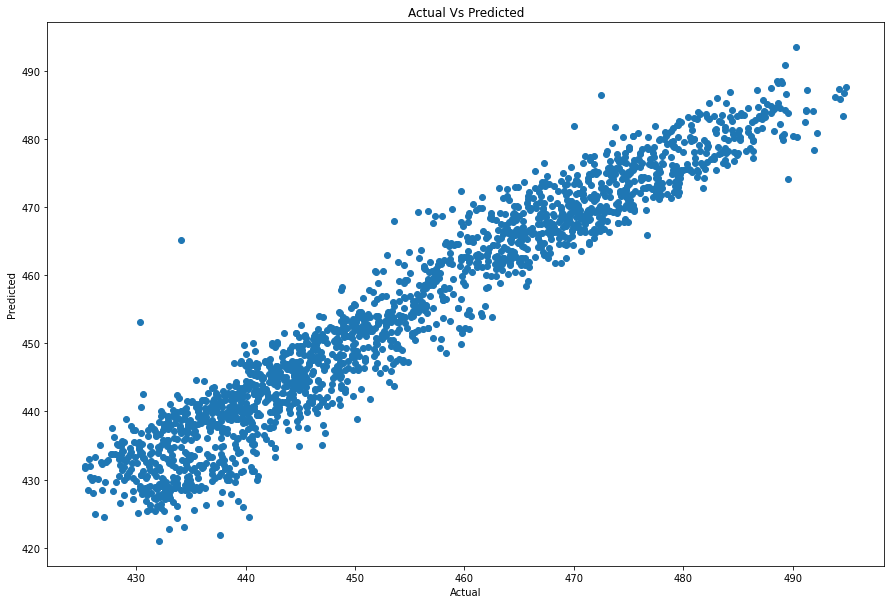

In [36]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,prediction)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted')
plt.show()